# Modeling Registered Bikes Rental

Prepared by Mina Roohnavazfar 

Email: mina.roohnavazfar@yahoo.com

August 2023

### Introduction

Bike sharing systems have emerged as a new generation of transportation services, offering convenient and automated rental processes. These systems allow users to easily rent bikes from one location and return them to another, providing flexibility and accessibility for urban commuters and tourists alike. Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 

These systems have gained immense popularity due to their convenience and accessibility. With the entire process, from membership to rental and return, being automated, users can effortlessly rent bikes from one location and return them at another. Currently, there are more than 500 bike-sharing programs worldwide, featuring over 500,000 bicycles. These systems have become crucial players in addressing traffic, environmental, and health concerns.

My project aims to forecast the number of bike rentals for the years 2011 and 2012 in Washington D.C., USA. The avaiable dataset also includes crucial weather and seasonal information, as these factors play a significant role in bike-sharing rental behaviors. Weather information for the dataset is sourced from https://www.freemeteo.com , ensuring that relevant environmental conditions are taken into account during the analysis.

In notebook `EDA.ipynb`, we explored and performed Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. During the EDA process, we applied a log transformation to the three target variables to address their skewness. As a result, we are working with the transformed versions of the target variables 't_cnt', 't_casual', and 't_registered', in modeling phase.

In this Jupyter Notebook, we will expand our previous work and delve into the Modeling phase focusing on target variable <font color='red'>**Registered Rentals**</font> 't_registered'.   

Given the characteristics of our dataset, our approach to predictive modeling involves using various regression techniques, including both linear and non-linear regression, neural networks, decision trees, ensemble methods, and PCA integrated models. The forthcoming stages of our project will involve refining these models and leveraging their predictive capabilities.

As we proceed with the development of our baseline models, we establish a robust model evaluation framework that aligns with the practical application of our models. This framework will enable us to assess the performance of our models accurately and make informed decisions regarding their robustness for the real-world scenarios. To achieve this, we will consider different evaluation metrics as **Percentage Mean Absolute Error (PMAE), R-squared, and adj R-squared** which help us identify which approaches offer superior predictive capabilities in modeling registered users bike rentals.

### Data Dictionary

Our dataset (data.csv) includes the following fields:

| Features | Description |
|:------------|:------------|
| instant     | Record index |
| dteday      | Date |
| season      | Season (1:springer, 2:summer, 3:fall, 4:winter) |
| yr          | Year (0: 2011, 1:2012) |
| mnth        | Month (1 to 12) |
| hr          | Hour (0 to 23) |
| holiday     | Whether day is holiday or not |
| weekday     | Day of the week |
| workingday  | If day is neither weekend nor holiday is 1, otherwise is 0. |
| weathersit  | Weather situation:<br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp        | Normalized temperature in Celsius (values divided by 41) |
| atemp       | Normalized feeling temperature in Celsius (values divided by 50) |
| hum         | Normalized humidity (values divided by 100) |
| windspeed   | Normalized wind speed (values divided by 67) |


| Target Variables | Description |
|:------------|:------------|
| casual      | Count of casual users rentals |
| <font color='red'>registered</font>   | <font color='red'>Count of registered users rentals</font> |
| cnt         | Total count of bike rentals for both casual and registered users|

### Table of contents
* Part 1: Importing Libraries, Loading and Preparing Data
* Part 2: Modeling Registered Users Rentals Target Variable
  * 2-1: Linear Regression on y_r
  * 2-2: Non Linear Regression on y_r
  * 2-3: Neural Network on y_r
  * 2-4: Decision Tree Regressoin on y_r
  * 2-5: Bagging on y_r
  * 2-6: Gradiant Boosting on y_r
* Part 3: PCA Integrated Models on y_r
    * 3-1: Pipeline with PCA and Gradient Boosting on y_r
    * 3-2: Integration PCA and Linear Regression on y_r
* Part 4: Recap (Insights on predicting y_r)

### Part 1: Importing Libraries, Loading and Preparing Data

In [75]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# for neural network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

# for feature importance 
import shap

# for regression models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# decision tree and ensemble methods
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read our preprocessed data from the CSV file:
data=pd.read_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 3/data_for_modeling.csv')

In [3]:
# sanity checks with the columns and the first 5 rows:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
0,0,0,0,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# display dimensions of data:
data.shape
print(f'Our dataset includes {data.shape[0]} rows and {data.shape[1]} columns.')

Our dataset includes 17379 rows and 56 columns.


In [5]:
# define feature matrix X and target variables y_t, y_c, and y_r corresponding to total count, casual users and registered users rentals

X=data.drop(['t_casual','t_registered','t_cnt'], axis = 1)        # X includes all the features in dataframe `data` 

y_t=data['t_cnt']+1      # for total count of bike rentals
y_c=data['t_casual']+1   # for casual users rentals
y_r=data['t_registered']+1  # for registered users rentals
# adjust the target variables by adding constant one to ensure positive values.
# This transformation helps prevent issues with calculations that involve logarithmic transformations.

In [6]:
# sanity check
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,season3,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
0,0,0,0,0.24,0.2879,0.81,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# adding a constant column to X for Linear and Non linear Regression models. 
X_withconstant = sm.add_constant(X)

In [8]:
# Keep 80% in the training set and put 20% in the test set
X_train, X_test, y_t_train, y_t_test,y_c_train, y_c_test ,y_r_train, y_r_test= train_test_split(X_withconstant, y_t,y_c,y_r, test_size=0.2, random_state=123)

It's important to note that in our train-test split function, we ensure that all three target variables are split in the same manner. As a result, they share exactly the same indices, making them directly comparable to each other.

In [9]:
# sanity check
print(y_c_test.head())
print(y_t_test.head())
print(y_r_test.head())

5792     5.997212
7823     5.736198
15426    3.197225
15028    5.276666
12290    4.526361
Name: t_casual, dtype: float64
5792     6.690359
7823     6.749393
15426    5.442651
15028    6.624018
12290    6.998937
Name: t_cnt, dtype: float64
5792     6.003946
7823     6.303305
15426    5.343805
15028    6.327876
12290    6.913503
Name: t_registered, dtype: float64


In [10]:
# sanity check
X_train.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
2837,1.0,0,0,1,0.54,0.5152,0.83,0.2836,0,1,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.56,0.5303,0.73,0.2985,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.18,0.1818,0.55,0.1940,0,1,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.74,0.6515,0.37,0.0896,0,0,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.58,0.5455,0.88,0.1343,0,1,...,0,0,0,0,0,0,0,0,0,0


### Part 2: Modeling Registered Users Rentals as Target Variable

### 2-1: Linear Regression on y_r 
At this point, our data is well prepared for modeling. Lets begin with linear regression model on registered users bike rentals (y_r).

In [11]:
# fit Regression Model on y_r_train and X_train 

lm= sm.OLS(y_r_train, X_train).fit()   #instantiation and fitting 
print(lm.summary())                     #summarization

                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:00:34   Log-Likelihood:                -12727.
No. Observations:               13903   AIC:                         2.556e+04
Df Residuals:                   13850   BIC:                         2.596e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7196      0.355     13.300      

The values of R-squared and adjusted R-squared are almost the same. The equality of these two metrics suggests the absence of overfitting. However, several predictors exhibit p-values greater than 0.05, indicating their lack of statistical significance. Consequently, these predictors should be removed from the model.

In [12]:
# Check Multicollinearity by computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
print(vif)  #If VIF > 10 then multicollinearity is high

       Variable      VIF
0         const  4661.21
1            yr     1.02
2       holiday      inf
3    workingday      inf
4          temp    57.66
5         atemp    49.73
6           hum     1.94
7     windspeed     1.25
8       season1     7.40
9       season2    10.48
10      season3     8.63
11        mnth1     3.13
12        mnth2     2.97
13        mnth3     3.17
14        mnth4     5.24
15        mnth5     6.05
16        mnth6     5.82
17        mnth7     6.73
18        mnth8     6.42
19        mnth9     4.15
20       mnth10     2.40
21       mnth11     2.17
22     weekday0     1.73
23     weekday1      inf
24     weekday2      inf
25     weekday3      inf
26     weekday4      inf
27     weekday5      inf
28  weathersit1  1049.24
29  weathersit2   900.43
30  weathersit3   343.50
31          hr0     1.93
32          hr1     1.94
33          hr2     1.94
34          hr3     1.93
35          hr4     1.90
36          hr5     1.93
37          hr6     1.96
38          hr7     1.94


Some variables have strong multicollinearity. In the subsequent steps, we modify the model by removing insignificant predictors and the ones causing multicollinearity.

In [13]:
# here, we remove the predictors with p_value > 0.05 and the ones with VIF>10 to build the modified model.
X_train_limited=X_train.drop(['weathersit3','season2','mnth1','mnth3','mnth11','mnth8','temp','weekday4'],axis=1)

lm2 = sm.OLS(y_r_train, X_train_limited).fit()      #instantiation and fitting 
print(lm2.summary())                                            #summarization

                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1337.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:00:37   Log-Likelihood:                -12772.
No. Observations:               13903   AIC:                         2.564e+04
Df Residuals:                   13857   BIC:                         2.598e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1747      0.054     77.582      

Now, all the p-values are less than 0.05. The values of R-squared and adjusted R-squared are both exactly 0.81.

In [14]:
# Check Multicollinearity by computing VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_limited.columns
vif["VIF"] = [round(variance_inflation_factor(X_train_limited.values, i),2) for i in range(X_train_limited.shape[1])]
print(vif)

       Variable     VIF
0         const  109.13
1            yr    1.02
2       holiday    1.44
3    workingday    3.04
4         atemp    3.59
5           hum    1.92
6     windspeed    1.17
7       season1    2.31
8       season3    3.00
9         mnth2    1.35
10        mnth4    1.38
11        mnth5    1.61
12        mnth6    1.54
13        mnth7    1.73
14        mnth9    1.37
15       mnth10    1.38
16     weekday0    1.73
17     weekday1    1.80
18     weekday2    1.71
19     weekday3    1.72
20     weekday5    1.72
21  weathersit1    4.02
22  weathersit2    3.42
23          hr0    1.93
24          hr1    1.94
25          hr2    1.94
26          hr3    1.93
27          hr4    1.90
28          hr5    1.93
29          hr6    1.96
30          hr7    1.94
31          hr8    1.95
32          hr9    1.95
33         hr10    1.93
34         hr11    1.98
35         hr12    1.98
36         hr13    2.02
37         hr14    2.05
38         hr15    2.04
39         hr16    2.04
40         hr17 

No multicollinearity is detected.

In following cells, we check the assumptions of regression models including normality of residuals and homoscedasticity.

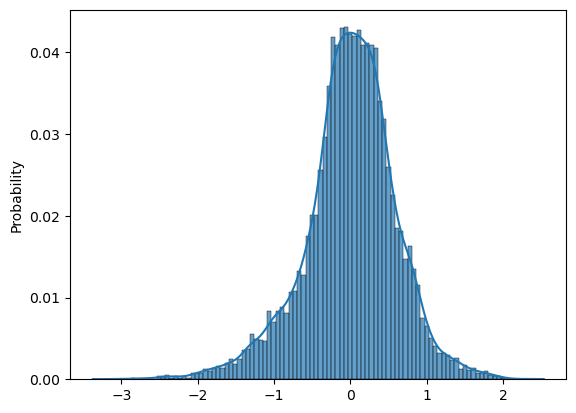

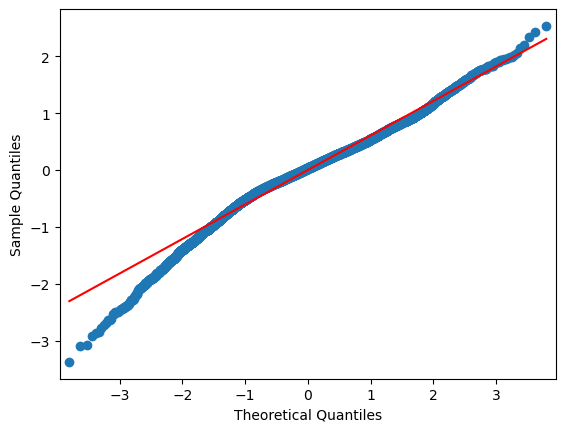

Shapiro-Wilk test on residuals: p-value = 0.000


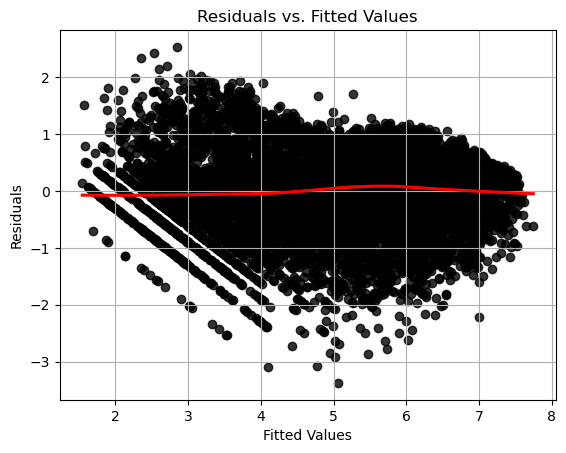

In [15]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm2.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm2.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm2.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm2.fittedvalues, y = lm2.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

Here, we create a horizontal bar plot to showcase the top coefficients with positive and negative values. This plot provides insight into the impact of features on the target variable y_r, encompassing both positive and negative relationships. Positive coefficients indicate features that positively contribute to the target variable, while negative coefficients suggest a negative impact.

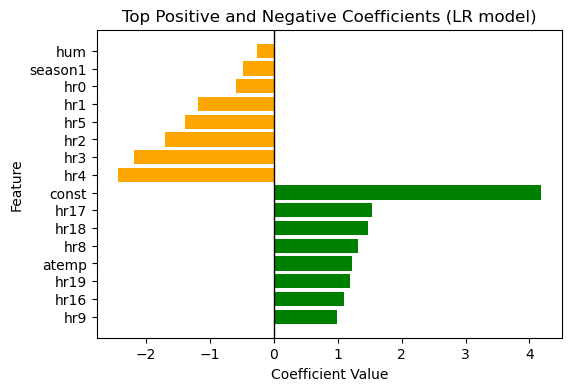

In [77]:
# Extract the coefficients of the model lm2 
coefficients = lm2.params
sorted_coefficients = coefficients.sort_values(ascending=True) # sort the coefficients in ascending order

# Select the eight largest positive coefficients and the eight smallest negative coefficients
top_positive = sorted_coefficients.tail(8)
top_negative = sorted_coefficients.head(8)

# Combine top positive and top negative coefficients
top_coefficients = pd.concat([top_positive, top_negative], axis=0)

# Determine colors based on positive and negative coefficients
colors = np.where(top_coefficients >= 0, 'green', 'orange')

# Create a horizontal bar plot with both positive and negative coefficients
plt.figure(figsize=(6, 4))
plt.barh(top_coefficients.index, top_coefficients, color=colors)
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 to separate positive and negative coefficients
plt.title("Top Positive and Negative Coefficients (LR model)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

The plot displays notable trends among the coefficient values for various hours. Hours such as hr17, hr18, and hr8, as well as atemp exhibit the most substantial positive coefficient values, suggesting their significant positive influence on the target variable. Conversely, hours such as hr4, hr3, hr2, and hr5 are associated with the most prominent negative coefficients, indicating a notable negative impact on the target variable. 

In following cell, we apply the model for prediction.

In [17]:
# first, X_test_limited is adjusted to match the columns present in X_train_limited. 
X_test_limited=X_test.drop(['weathersit3','season2','mnth1','mnth3','mnth11','mnth8','temp','weekday4'],axis=1)

# prediction y_r on train and test data using Linear regression model lm2 
pred_test_lm2 = lm2.predict(X_test_limited)
pred_train_lm2 = lm2.predict(X_train_limited)

In [18]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_lm2 = abs((y_r_test - pred_test_lm2) / y_r_test)      # Percentage Absolute Error 
pmae_test_lm2 = np.mean(abs_err_lm2)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_lm2 = abs((y_r_train - pred_train_lm2) / y_r_train)      # Percentage Absolute Error 
pmae_train_lm2 = np.mean(abs_err_lm2)*100                    # Percentage Mean Absolute Error (PMAE)

In [19]:
# create a dataframe to compare different models
model_comp = pd.DataFrame({ 'Target variable' : 'Registered Rentals',
                           'PMAE on train':   np.round(pmae_train_lm2,2),
                           'PMAE on test':    np.round(pmae_test_lm2,2),
                           'R-squared' :      lm2.rsquared,
                           'Adjusted R-squared' : lm2.rsquared_adj,
                          }, index = ['Linear Regression'])
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173


Finding:
- The PMAE values for train and test datasets are nearly identical which indicates the robustness of model performance.
- The R-squared and adj R-squared values are almost the same.

### 2-2: Non Linear Regression on y_r 

Here, to enhance the model's performance, we introduce additional interaction and squared variables into our regression model.

In [20]:
# we are going to utilize the statistically significant predictors identified within the linear regression model.
X_train_modified=X_train_limited.copy()
X_test_modified=X_test_limited.copy()

In [21]:
# here, all the possible interaction and squared variables are added to the train and test data.
import itertools
# List of columns for interactions
columns = X_train_modified.columns

# Generate all possible pairs of interactions
interaction_pairs = list(itertools.combinations(columns, 2))

# Loop through interaction pairs and create new columns
for interaction in interaction_pairs:
    var1, var2 = interaction
    new_column_name = f'{var1}_{var2}_interaction'
    X_train_modified[new_column_name] = X_train_modified[var1] * X_train_modified[var2]
    X_test_modified[new_column_name] = X_test_modified[var1] * X_test_modified[var2]

In [22]:
# sanity check
X_train_modified.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season1,season3,mnth2,...,hr18_hr19_interaction,hr18_hr20_interaction,hr18_hr21_interaction,hr18_hr22_interaction,hr19_hr20_interaction,hr19_hr21_interaction,hr19_hr22_interaction,hr20_hr21_interaction,hr20_hr22_interaction,hr21_hr22_interaction
2837,1.0,0,0,1,0.5152,0.83,0.2836,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.5303,0.73,0.2985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.1818,0.55,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.6515,0.37,0.0896,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.5455,0.88,0.1343,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utilizing a backward elimination process, we systematically remove insignificant predictors with (p-value > 0.05) 
from the models. In a loop defined for this purpose, the regression model is iteratively fitted to the training data
until all predictors with insignificance have been eliminated.

In [23]:
# Initialize the loop
while True:
    # Fit the linear regression model
    lm3 = sm.OLS(y_r_train, X_train_modified).fit()
    
    # Get the p-values for each feature
    p_values = lm3.pvalues
    
    # Find interactions with p-values greater than 0.05 or NaN
    non_significant_interactions = p_values[(p_values >= 0.05) | p_values.isna()]
    
    # If no non-significant interactions remain, exit the loop
    if non_significant_interactions.empty:
        break
    
    # Drop non-significant interactions from X_train_modified
    X_train_modified = X_train_modified.drop(non_significant_interactions.index, axis=1)

# Print the final summary of the model
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     731.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:01:29   Log-Likelihood:                -8050.7
No. Observations:               13903   AIC:                         1.646e+04
Df Residuals:                   13723   BIC:                         1.782e+04
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

All the p-values are less than 0.05.

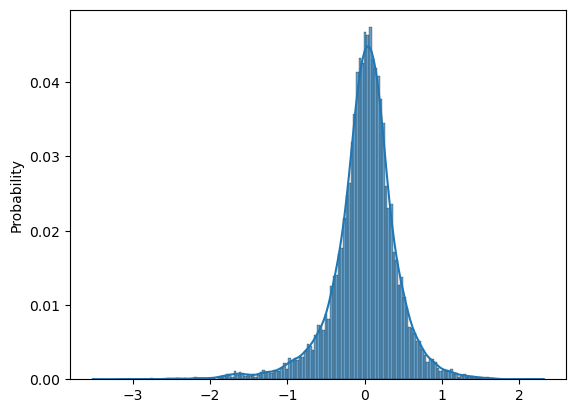

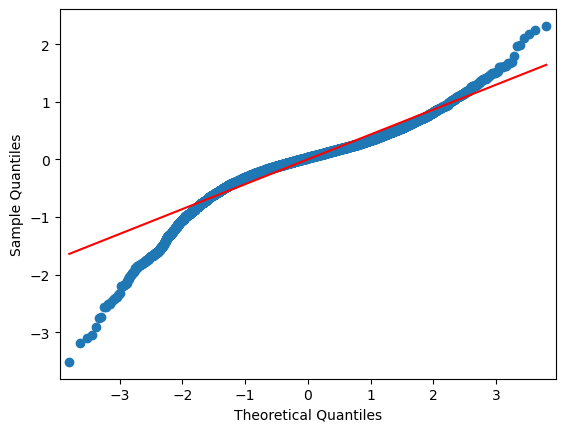

Shapiro-Wilk test on residuals: p-value = 0.000


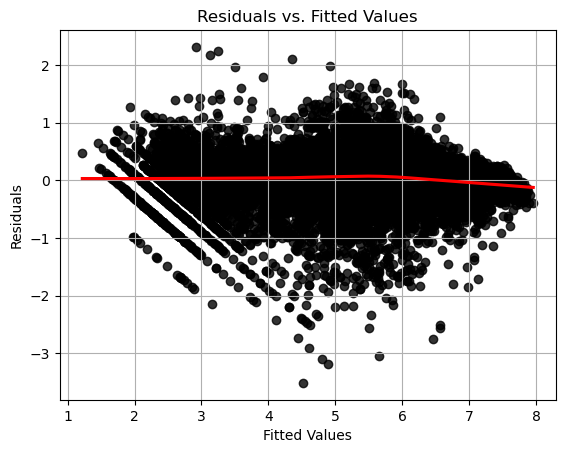

In [24]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm3.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm3.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm3.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm3.fittedvalues, y = lm3.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

Here, we create a horizontal bar plot to showcase the top coefficients with positive and negative values. This plot provides insight into the impact of features on the target variable, encompassing both positive and negative relationships. Positive coefficients indicate features that positively contribute to the target variable, while negative coefficients suggest a negative impact.

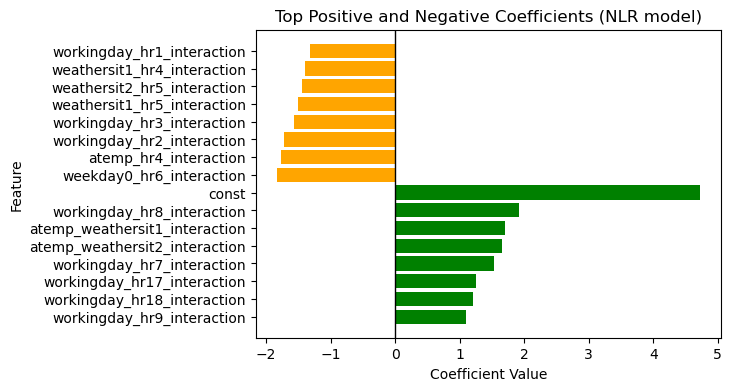

In [78]:
# Extract the coefficients of the model lm3 and sort them in ascending order
coefficients = lm3.params
sorted_coefficients = coefficients.sort_values(ascending=True)

# Select the eight largest positive coefficients and the eight smallest negative coefficients
top_positive = sorted_coefficients.tail(8)
top_negative = sorted_coefficients.head(8)

# Combine top positive and top negative coefficients
top_coefficients = pd.concat([top_positive, top_negative], axis=0)

# Determine colors based on positive and negative coefficients
colors = np.where(top_coefficients >= 0, 'green', 'orange')

# Create a horizontal bar plot with both positive and negative coefficients
plt.figure(figsize=(6, 4))
plt.barh(top_coefficients.index, top_coefficients, color=colors)
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 to separate positive and negative coefficients
plt.title("Top Positive and Negative Coefficients (NLR model)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

The plot displays notable trends among the coefficient values for various variables. Interactions between workingday and hr8, atemp and weathersit1, atemp and weathersit2, ... exhibit the most substantial positive coefficient values, suggesting their significant positive influence on the target variable. Conversely, interactions between weekday0 and hr6, atemp and hr4, workingday and hr2 are associated with the most prominent negative coefficients, indicating a notable negative impact on the target variable. 

In [26]:
# Before prediction, X_test_modified is adjusted to match the columns present in X_train_modified. 
# This ensures that the columns used in the training data are consistently applied to the test data.
X_test_modified = X_test_modified[X_train_modified.columns]
X_test_modified.head()

,const,yr_season1_interaction,yr_mnth5_interaction,yr_weathersit1_interaction,yr_weathersit2_interaction,yr_hr1_interaction,yr_hr2_interaction,yr_hr3_interaction,yr_hr4_interaction,yr_hr7_interaction,...,weathersit1_hr1_interaction,weathersit1_hr2_interaction,weathersit1_hr3_interaction,weathersit1_hr4_interaction,weathersit1_hr5_interaction,weathersit2_hr1_interaction,weathersit2_hr2_interaction,weathersit2_hr3_interaction,weathersit2_hr4_interaction,weathersit2_hr5_interaction
5792,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7823,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15426,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15028,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,1.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# compute predictions for both train and test applying non linear regression model lm3 on y_r
pred_test_lm3 = lm3.predict(X_test_modified)
pred_train_lm3 = lm3.predict(X_train_modified)

In [28]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_lm3 = abs((y_r_test - pred_test_lm3) / y_r_test)      # Percentage Absolute Error 
pmae_test_lm3 = np.mean(abs_err_lm3)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_lm3 = abs((y_r_train - pred_train_lm3) / y_r_train)      # Percentage Absolute Error 
pmae_train_lm3 = np.mean(abs_err_lm3)*100                    # Percentage Mean Absolute Error (PMAE)

In [29]:
# append a new row of metrics values for non linear regression model to dataframe model_comp:
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'Registered Rentals',
                                             'PMAE on train':    np.round(pmae_train_lm3,2),
                                            'PMAE on test':    np.round(pmae_test_lm3,2),
                                            'R-squared' : lm3.rsquared,
                                            'Adjusted R-squared' : lm3.rsquared_adj,
                                              }, index = ['Non Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837


Finding:
- Non Linear Regression show better performance than Linear Regression across the evaluation metrics.
- PMAE values for test and train are nearly identical which proves the robustness of the model.

### 2-3: Neural Network on y_r

Here, we apply Neural Network to model registered rentals variable y_r.

In [30]:
# set stopping criteria
callbacks = EarlyStopping(monitor='mean_absolute_error', min_delta=0.001, patience=5)

In [31]:
# Instantiate a Feed Forward neural network
model_NN = Sequential()

# dense layers
model_NN.add(tf.keras.layers.InputLayer(input_shape=(54,)))

model_NN.add(Dense(40, activation='relu'))
model_NN.add(Dense(20, activation='relu'))
model_NN.add(Dense(10, activation='relu'))

# Single node output as this is regression
model_NN.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
model_NN.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=[MeanAbsoluteError()])

In [32]:
# fit model
history = model_NN.fit(X_train,y_r_train, epochs=100, verbose=1, callbacks=[callbacks])
   
# Keep a running tally of the training history over ALL epochs
mae_list = []
mae_list = mae_list + history.history['mean_absolute_error']


Epoch 1/100
435/435 [==============================] - 2s 2ms/step - loss: 1.1117 - mean_absolute_error: 1.1117
Epoch 2/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3694 - mean_absolute_error: 0.3694
Epoch 3/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2621 - mean_absolute_error: 0.2621
Epoch 4/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2388 - mean_absolute_error: 0.2388
Epoch 5/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2305 - mean_absolute_error: 0.2305
Epoch 6/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2249 - mean_absolute_error: 0.2249
Epoch 7/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2220 - mean_absolute_error: 0.2220
Epoch 8/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2201 - mean_absolute_error: 0.2201
Epoch 9/100
435/435 [==============================] - 1s 2ms/step - loss: 0.2144 - mean_absolute_error:

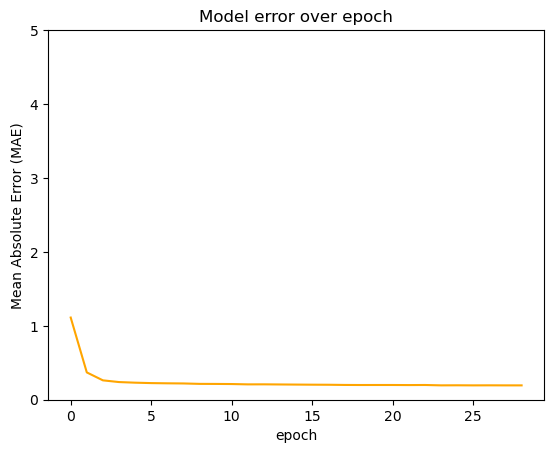

In [33]:
# mean_absolute_error for each epoch
plt.plot(mae_list, c='orange')
plt.ylim(0,5)
plt.title('Model error over epoch')
plt.xlabel('epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

Here, we create a horizontal bar plot to visualize the top 10 feature importances in our Neural Network model using Shapley values for global interpretation. Below, we plot the average absolute Shapley values for each feature.

In [79]:
%%time 

# Convert DataFrame to NumPy array
X_train_np = X_train.to_numpy()  # Assuming X_train is your DataFrame

# Initialize a DeepExplainer
explainer = shap.DeepExplainer(model_NN, data=X_train_np)

# Obtain SHAP values
shap_values = explainer.shap_values(X_train_np)

CPU times: total: 34min 44s
Wall time: 16min 40s


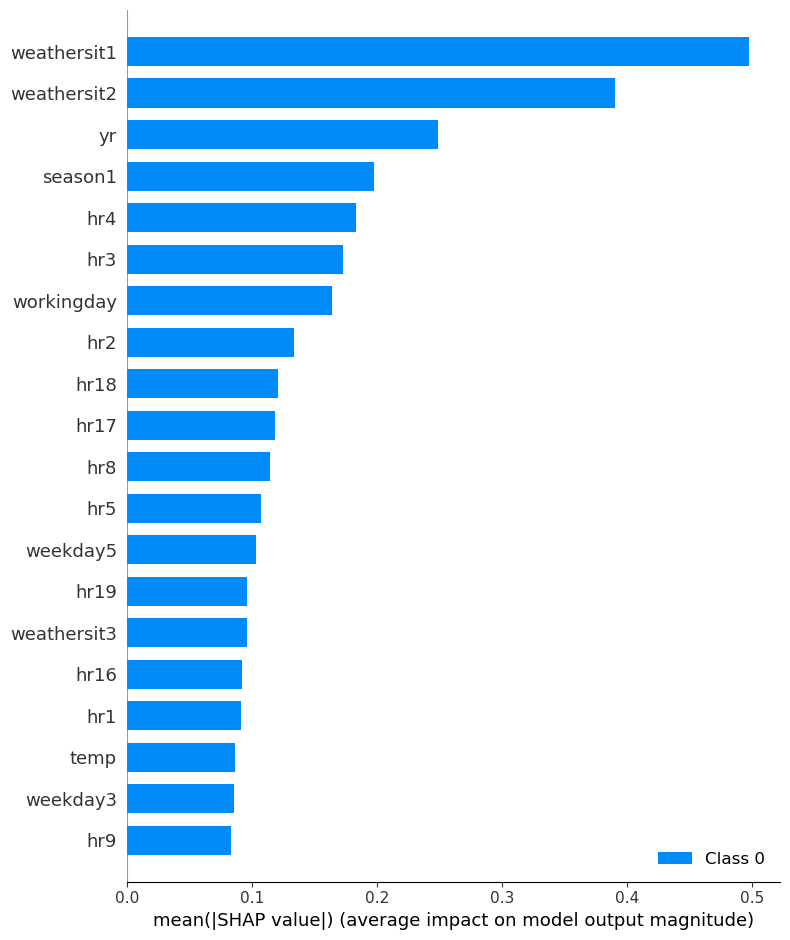

In [80]:
# Global interpretation - summary plot - type='bar'
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

As seen above, weathersit 1 and 2, year, first season, ... are the most important features of our NN model as it has the greatest average contribution to the prediction.

In [34]:
# compute predictions for both test and train applying Neural Network model on y_r
pred_test_NN = model_NN.predict(X_test)
pred_train_NN = model_NN.predict(X_train)

435/435 [==============================] - 1s 2ms/step


In [35]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_NN = abs((y_r_test - pred_test_NN.flatten()) / y_r_test)      # Percentage Absolute Error 
pmae_test_NN = np.mean(abs_err_NN)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_NN = abs((y_r_train - pred_train_NN.flatten()) / y_r_train)      # Percentage Absolute Error 
pmae_train_NN = np.mean(abs_err_NN)*100                    # Percentage Mean Absolute Error (PMAE)

In [36]:
# Calculate R-squared and Adjusted R-squared for train data
r2_train_NN = r2_score(y_r_train, pred_train_NN)
n_train, p_train = X_train.shape
adj_r2_train_NN = 1 - ((1 - r2_train_NN) * (n_train - 1)) / (n_train - p_train - 1)

In [37]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                             'PMAE on train': np.round(pmae_train_NN,2),
                                             'PMAE on test': np.round(pmae_test_NN,2),
                                             'R-squared': r2_train_NN,
                                             'Adjusted R-squared': adj_r2_train_NN},
                                            index=['Neural Network']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211


Finding:
- As expected, Neural Network model outperforms the two regression models across all the evaluated metrics.
- The PMAE values for the train dataset are slightly lower than those for the test dataset in the Neural Network model. However, this difference is not significant enough to be considered indicative of overfitting.

### 2-4: Desion Tree on y_r

Here, we apply Decision Tree Regressor to model registered rentals target variable y_r.

In [38]:
# Define three hyperparameters to tune
param_grid ={
        'max_depth': [5, 10, 20,30,40,50],
        'min_samples_leaf': [2,5,10,15,20],
        'ccp_alpha': [0.0001,0.001,0.01, 0.1]  # for regularization
            }

# Perform Grid Search with 5-fold cross-validation to find the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
fittedgrid = grid_search.fit(X_train.iloc[:,1:], y_r_train) # exclude the constant column from X_train 

# Get the best parameters and the best model
best_params = fittedgrid.best_params_
best_model_p = fittedgrid.best_estimator_

print("Best Hyperparameters:")
print(best_params)

best_model_p.fit(X_train.iloc[:,1:], y_r_train)
# report the train and test R squared
R_squared_train=best_model_p.score( X_train.iloc[:,1:], y_r_train)
R_squared_test=best_model_p.score( X_test.iloc[:,1:], y_r_test)

print(f'R-squared on train: {R_squared_train}')
print(f'R-squared on test: {R_squared_test}')


Best Hyperparameters:
{'ccp_alpha': 0.0001, 'max_depth': 50, 'min_samples_leaf': 5}
R-squared on train: 0.9378154895672373
R-squared on test: 0.9018421690255539


In [39]:
# fit best decision Tree Regressor Model on X_train and y_r_train based on the best values of hyperparameters obtained above. 
reg_tree = DecisionTreeRegressor(max_depth = 50, min_samples_leaf = 5, ccp_alpha = 0.0001)
model_tree = reg_tree.fit(X_train.iloc[:,1:], y_r_train)

Here, we create a horizontal bar plot to visualize the top 10 feature importances in our Decision Tree model.
Feature importances represent the relative contribution of each feature to the model.
Larger importances indicate features with greater predictive power.

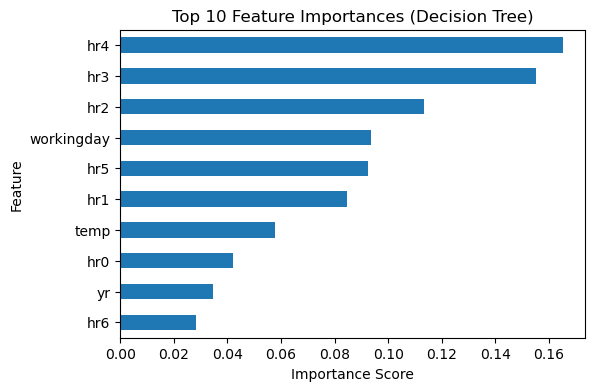

In [40]:
# Get feature importances in decision tree model
feature_importances = model_tree.feature_importances_

# Create a pandas Series for easy sorting
importances_series = pd.Series(feature_importances, index=X_train.iloc[:,1:].columns)

# Sort feature importances in descending order
sorted_importances = importances_series.sort_values(ascending=False)

# Select top 10 feature importances
top_10_importances = sorted_importances.head(10)

# Create a horizontal bar plot for feature importances with largest bar at top
plt.figure(figsize=(6, 4))
top_10_importances.plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert the y-axis to put the largest bar at the top
plt.show()

Features such as hr4, hr3, hr2, and workingday have emerged as the most influential attributes in our decision tree model.

In [41]:
# Compute prediction for both train and test applying Decision Tree Regressor
pred_test_tree = model_tree.predict(X_test.iloc[:,1:])
pred_train_tree = model_tree.predict(X_train.iloc[:,1:])

In [42]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_tree = abs((y_r_test - pred_test_tree) / y_r_test)      # Percentage Absolute Error 
pmae_test_tree = np.mean(abs_err_tree)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_tree = abs((y_r_train - pred_train_tree) / y_r_train)      # Percentage Absolute Error 
pmae_train_tree = np.mean(abs_err_tree)*100                    # Percentage Mean Absolute Error (PMAE)

In [43]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.iloc[:,1:].shape
adj_r2_train_tree = 1 - ((1 - R_squared_train) * (n_train - 1)) / (n_train - p_train - 1)

In [44]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                            'PMAE on train': np.round(pmae_train_tree,2),
                                             'PMAE on test': np.round(pmae_test_tree,2),
                                             'R-squared': R_squared_train,
                                             'Adjusted R-squared': adj_r2_train_tree},
                                            index=['Decision Tree']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211
Decision Tree,Registered Rentals,5.75,6.83,0.937815,0.937578


Finding:
- In dealing with the registered users rentals variable, the Decision Tree model exhibits better performance compared to the Linear and Non Linear Regression models, and its performance is inferior to the Neural Network.
- The PMAE values for the train dataset are slightly lower than that for the test dataset in Decision Tree model. However, this difference is not significant enough to be considered indicative of overfitting.
- The R-squared and adjusted R-squared values are nearly identical.

### 2-5: Bagging on y_r

Here, we apply Bagging approach to model registered rentals target variable y_r.
In our preliminary analysis, we employed both the bagging and random forest models. However, our findings reveal that the bagging model exhibited superior performance. This advantage can be attributed to the fact that the bagging model considers all the features within the dataset, while the random forest model involves a selection of features performed randomly.

In [47]:
# Instantiate a RandomForestRegressor (for Bagging) 
bag = RandomForestRegressor()

# Define the hyperparameter grid for tuning
parameters = {
    'max_depth': [20,30,50,60],
    'n_estimators': [100,200,300,400],
    'ccp_alpha': [0.0001,0.001,0.01,0.1]
}
# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search_bag = GridSearchCV(bag, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_bag.fit(X_train.iloc[:,1:], y_r_train)

# best score
print(f"best score: {grid_search_bag.best_score_}")

# best hyperparameters 
print(f"best parameters: {grid_search_bag.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
best score: 0.9301219453742027
best parameters: {'ccp_alpha': 0.0001, 'max_depth': 50, 'n_estimators': 400}


In [48]:
# fit best Bagging Model on and X_train and y_t_train based on the best values of hyperparameters obtained above. 
bag_model = RandomForestRegressor(max_depth = 50, max_features = 53, n_estimators = 400,ccp_alpha = 0.0001,random_state = 123) 
bag = bag_model.fit(X_train.iloc[:,1:], y_r_train)

# report the train and test R^2
R_squared_train_bag=bag.score( X_train.iloc[:,1:], y_r_train)
print(f"R^2 for train: {R_squared_train_bag}")
R_squared_test_bag=bag.score( X_test.iloc[:,1:], y_r_test)
print(f"R^2 for test: {R_squared_test_bag}")

R^2 for train: 0.9641447154652489
R^2 for test: 0.9289363064622493


Here, we create a horizontal bar plot to visualize the top 10 feature importances in our Bagging model.
Feature importances represent the relative contribution of each feature to the model.
Larger importances indicate features with greater predictive power.

<Figure size 600x400 with 0 Axes>

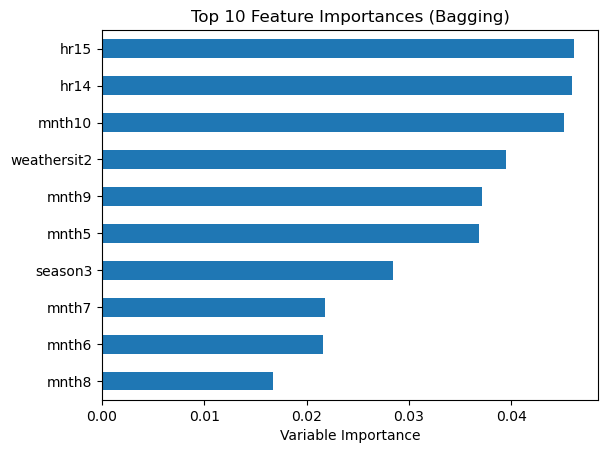

In [82]:
# Calculate feature importances based on the Bagging model
Importance = pd.DataFrame({'Importance':bag.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)
# Select the top 10 most important features
top_10_importances = Importance.sort_values(by = 'Importance', axis = 0, ascending = True).head(10)

# Create a horizontal bar plot for the top 10 feature importances
plt.figure(figsize=(6, 4)) 
top_10_importances.plot(kind = 'barh')
plt.title("Top 10 Feature Importances (Bagging)")
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Attributes like hr15, hr14, mnth10, and weathersit2 have surfaced as the most influential features within our Bagging model.

In [50]:
# Compute prediction for both train and test applying Bagging Regressor
pred_test_bag =bag.predict(X_test.iloc[:,1:])
pred_train_bag = bag.predict(X_train.iloc[:,1:])

In [51]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_bag = abs((y_r_test - pred_test_bag) / y_r_test)      # Percentage Absolute Error 
pmae_test_bag = np.mean(abs_err_bag)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_bag = abs((y_r_train - pred_train_bag) / y_r_train)      # Percentage Absolute Error 
pmae_train_bag = np.mean(abs_err_bag)*100                    # Percentage Mean Absolute Error (PMAE)

In [52]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.iloc[:,1:].shape
adj_r2_train_bag = 1 - ((1 - R_squared_train_bag) * (n_train - 1)) / (n_train - p_train - 1)

In [53]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                            'PMAE on train': np.round(pmae_train_bag,2),
                                             'PMAE on test': np.round(pmae_test_bag,2),
                                             'R-squared': R_squared_train_bag,
                                             'Adjusted R-squared': adj_r2_train_bag},
                                            index=['Bagging']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211
Decision Tree,Registered Rentals,5.75,6.83,0.937815,0.937578
Bagging,Registered Rentals,4.63,6.01,0.964145,0.964007


Finding:
- In predicting y_r, the Bagging model exhibits better performance compared to the Regression models and Decision Tree and its performance is slightly inferior to the Neural Network.
- The PMAE values for the train dataset are slightly lower than that for the test dataset in Decision Tree model. However, this difference is not significant enough to be considered indicative of overfitting.
- The Bagging model demonstrates the highest R-squared and adjusted R-squared values when compared to the other models.

### 2-6: Gradient Boosting on y_r

Here, we apply Gradient Boosting to model registered users target variable y_r.

In [ ]:
# Instantiate a Gradient Boosting Regressor
GB = GradientBoostingRegressor()

# Define the hyperparameter grid for tuning
parameters = {
    'min_samples_leaf': [5,10,15,30,53], 
    'max_depth': [5,10,30,50],
    'subsample' : [0.5, 0.7, 0.9],
    'learning_rate': [0.0001,0.001,0.01, 0.1,1]
}
# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search_GB = GridSearchCV(GB, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_GB.fit(X_train.iloc[:,1:], y_r_train)

# best score
print(f"best score: {grid_search_GB.best_score_}")

# best parameters 
print(f"best parameters: {grid_search_GB.best_params_}")

In [54]:
# fit best Gradient Boosting Regressor Model on and X_train and y_t_train based on the best values of hyperparameters obtained above. 
GB_model = GradientBoostingRegressor(max_depth = 50, min_samples_leaf = 30, subsample= 0.9,learning_rate = 0.1,random_state = 123) 
GB = GB_model.fit(X_train.iloc[:,1:], y_r_train)

# report the train and test R^2
R_squared_train_GB=GB.score( X_train.iloc[:,1:], y_r_train)
print(f"R^2 for train: {R_squared_train_GB}")
R_squared_test_GB=GB.score( X_test.iloc[:,1:], y_r_test)
print(f"R^2 for test: {R_squared_test_GB}")

R^2 for train: 0.9805923142249658
R^2 for test: 0.9472585858518134


Here, we create a horizontal bar plot to visualize the top 10 feature importances in our Gradient Boosting model.
Larger importances indicate features with greater predictive power.

<Figure size 600x400 with 0 Axes>

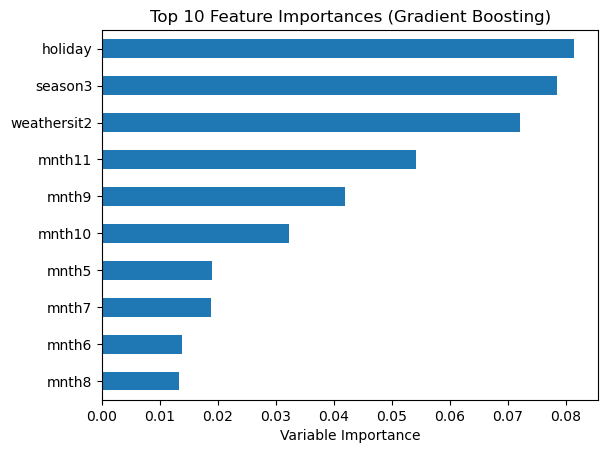

In [83]:
# Calculate feature importances based on the Gradient Boosting Regressor
Importance = pd.DataFrame({'Importance':GB.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)

# Select the top 10 most important features
top_10_importances = Importance.sort_values(by = 'Importance', axis = 0, ascending = True).head(10)

# Create a horizontal bar plot for the top 10 feature importances
plt.figure(figsize=(6, 4)) 
top_10_importances.plot(kind = 'barh')
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Features such as weekday2, season3 and weathersit2 have emerged as the most influential attributes in our Gradient Boosting model.

In [56]:
# Compute prediction for both train and test applying Gradiant Boost Regressor
pred_test_GB = GB.predict(X_test.iloc[:,1:])
pred_train_GB = GB.predict(X_train.iloc[:,1:])

In [57]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_GB = abs((y_r_test - pred_test_GB) / y_r_test)      # Percentage Absolute Error 
pmae_test_GB = np.mean(abs_err_GB)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_GB = abs((y_r_train - pred_train_GB) / y_r_train)      # Percentage Absolute Error 
pmae_train_GB = np.mean(abs_err_GB)*100                    # Percentage Mean Absolute Error (PMAE)

In [58]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.iloc[:,1:].shape
adj_r2_train_GB= 1 - ((1 - R_squared_train_GB) * (n_train - 1)) / (n_train - p_train - 1)

In [59]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                            'PMAE on train': np.round(pmae_train_GB,2),
                                             'PMAE on test': np.round(pmae_test_GB,2),
                                             'R-squared': R_squared_train_GB,
                                             'Adjusted R-squared': adj_r2_train_GB},
                                            index=['Gradient Boosting']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211
Decision Tree,Registered Rentals,5.75,6.83,0.937815,0.937578
Bagging,Registered Rentals,4.63,6.01,0.964145,0.964007
Gradient Boosting,Registered Rentals,3.22,5.23,0.980592,0.980518


Finding:
- In predicting y_r, the Gradient Boosting model showcases superior performance compared to all other models on the training dataset. However, its performance on the test dataset is almost indistinguishable from that of the Neural Network model.
- The PMAE values for the train dataset are slightly lower than that for the test dataset in Gradient Boosting model. However, this difference is not significant enough to be considered indicative of overfitting.
- The Gradient Boosting model demonstrates the highest R-squared and adjusted R-squared values when compared to all the other models.

### Part 3: PCA Integrated Models on y_r

In this phase, our objective is to employ Principle Component Analysis (PCA) on both the best and worst performing models in predicting the rentals for registered users (y_r). This approach aims to investigate how the application of PCA may impact the performance of these models. By exploring the influence of PCA on both optimal and suboptimal models, we aim to gain insights into its potential to enhance predictive accuracy and uncover any potential trade-offs.

### 3-1: Pipeline with PCA and Gradient Boosting on y_r

Here, we construct a pipeline model that integrates both Principal Component Analysis (PCA) and our highest-performing model, Gradient Boosting. 

In [60]:
# Set up the estimators for PCA and Gradient Boosting
estimators = [
    ('pca', PCA()),
    ('GB', GradientBoostingRegressor())
]

# Create a pipeline using the defined estimators
pipe = Pipeline(estimators)

# Define hyperparameters to tune for both PCA and Gradient Boosting
param_grid ={
       'GB__max_depth':[10,20,30,40],
       'GB__min_samples_leaf':[20,40,50],
       'GB__learning_rate':[0.001,0.01,0.1],
       'GB__subsample' :[ 0.5,0.7,0.9],
       'pca__n_components':[0.7,0.9,0.95]
            }

# Perform Grid Search with 5-fold cross-validation to find the best parameters
grid_search = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid_search.fit(X_train.iloc[:,1:], y_r_train)

# Retrieve the best parameters and the best model from the grid search
best_params = fittedgrid.best_params_
best_model_pip = fittedgrid.best_estimator_

print("Best Hyperparameters:")
print(best_params)

# Fit the best pipeline model on the training data
best_model_pip.fit(X_train.iloc[:,1:], y_r_train)

# Report the R-squared scores on the training and test datasets
R_squared_train_pip=best_model_pip.score( X_train.iloc[:,1:], y_r_train)
R_squared_test_pip=best_model_pip.score( X_test.iloc[:,1:], y_r_test)

print(f'R^2 on train: {R_squared_train_pip}')
print(f'R^2 on test: {R_squared_test_pip}')

Best Hyperparameters:
{'GB__learning_rate': 0.1, 'GB__max_depth': 30, 'GB__min_samples_leaf': 40, 'GB__subsample': 0.9, 'pca__n_components': 0.9}
R^2 on train: 0.9859982709496458
R^2 on test: 0.9366389982765684


In [61]:
# Compute prediction for both train and test applying best pipeline model
pred_test_pip = best_model_pip.predict(X_test.iloc[:,1:])
pred_train_pip = best_model_pip.predict(X_train.iloc[:,1:])

In [62]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_pip = abs((y_r_test - pred_test_pip) / y_r_test)      # Percentage Absolute Error 
pmae_test_pip = np.mean(abs_err_pip)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_pip = abs((y_r_train - pred_train_pip) / y_r_train)      # Percentage Absolute Error 
pmae_train_pip = np.mean(abs_err_pip)*100                    # Percentage Mean Absolute Error (PMAE)

In [63]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.iloc[:,1:].shape
adj_r2_train_pip= 1 - ((1 - R_squared_train_pip) * (n_train - 1)) / (n_train - p_train - 1)

In [64]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                            'PMAE on train': np.round(pmae_train_pip,2),
                                             'PMAE on test': np.round(pmae_test_pip,2),
                                             'R-squared': R_squared_train_pip,
                                             'Adjusted R-squared': adj_r2_train_pip},
                                            index=['Pipeline PCA and Gradient Boosting']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211
Decision Tree,Registered Rentals,5.75,6.83,0.937815,0.937578
Bagging,Registered Rentals,4.63,6.01,0.964145,0.964007
Gradient Boosting,Registered Rentals,3.22,5.23,0.980592,0.980518
Pipeline PCA and Gradient Boosting,Registered Rentals,2.71,5.63,0.985998,0.985945


Finding:
- Considering test dataset, the PMAE values achieved from integrating PCA and Gradient Boosting within a pipeline on test data are close to those obtained from individual Gradient Boosting. Therefore, the combined approach does not significantly improve the minimization of prediction errors on this dataset. However, it's worth noting that when comparing PMAE values with the Gradient Boosting model, the combination approach results in lower PMAE values for the training data.
- The integrating PCA and Gradient Boosting demonstrates the highest R-squared and adjusted R-squared values when compared to all the other models.

### 3-2: Integration PCA and Linear Regression on y_r

Here, we combine both Principal Component Analysis (PCA) and our least performing model, Linear Regression.

In [65]:
# Perform Principal Component Analysis (PCA)
# Specify the desired explained variance ratio of 95%
pca = PCA(n_components=0.95)

# Transform the training and test datasets using PCA
X_train_pca = pca.fit_transform(X_train.iloc[:,1:])
X_test_pca = pca.transform(X_test.iloc[:,1:])

# Display the shape of the transformed training dataset
X_train_pca.shape

(13903, 39)

By implementing PCA with a target explained variance of 95% (n_components parameter), the number of components is reduced to 39.

In [66]:
# Add a constant for intercept to the transformed training dataset
X_train_pca = sm.add_constant(X_train_pca)  

# Fit OLS model using the transformed training dataset
model_pcalm = sm.OLS(y_r_train, X_train_pca).fit()
print(model_pcalm.summary()) 

                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     906.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:30:25   Log-Likelihood:                -15614.
No. Observations:               13903   AIC:                         3.131e+04
Df Residuals:                   13863   BIC:                         3.161e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3769      0.006    851.021      0.0

In [67]:
# Add a constant for intercept to the transformed test dataset
X_test_pca = sm.add_constant(X_test_pca)  

# Predict y_r values using the PCA-enhanced Linear Regression model
pred_test_pcalm = model_pcalm.predict(X_test_pca)
pred_train_pcalm = model_pcalm.predict(X_train_pca)

In [68]:
# compute Percentage Mean Absolute Error (PMAE)
# for test:
abs_err_pcalm = abs((y_r_test - pred_test_pcalm) / y_r_test)      # Percentage Absolute Error 
pmae_test_pcalm = np.mean(abs_err_pcalm)*100                    # Percentage Mean Absolute Error (PMAE)

# for train:
abs_err_pcalm = abs((y_r_train - pred_train_pcalm) / y_r_train)      # Percentage Absolute Error 
pmae_train_pcalm = np.mean(abs_err_pcalm)*100                    # Percentage Mean Absolute Error (PMAE)

In [69]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.iloc[:,1:].shape
adj_r2_train_pip= 1 - ((1 - R_squared_train_pip) * (n_train - 1)) / (n_train - p_train - 1)

In [70]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'Registered Rentals',
                                            'PMAE on train': np.round(pmae_train_pcalm,2),
                                             'PMAE on test': np.round(pmae_test_pcalm,2),
                                             'R-squared': model_pcalm.rsquared,
                                             'Adjusted R-squared': model_pcalm.rsquared_adj},
                                            index=['PCA and Linear Regression']),
                               ignore_index=False)
model_comp


,Target variable,PMAE on train,PMAE on test,R-squared,Adjusted R-squared
Linear Regression,Registered Rentals,10.59,10.11,0.812781,0.812173
Non Linear Regression,Registered Rentals,7.05,7.08,0.905075,0.903837
Neural Network,Registered Rentals,4.64,5.27,0.956381,0.956211
Decision Tree,Registered Rentals,5.75,6.83,0.937815,0.937578
Bagging,Registered Rentals,4.63,6.01,0.964145,0.964007
Gradient Boosting,Registered Rentals,3.22,5.23,0.980592,0.980518
Pipeline PCA and Gradient Boosting,Registered Rentals,2.71,5.63,0.985998,0.985945
PCA and Linear Regression,Registered Rentals,13.60,13.19,0.718214,0.717421


Finding:
- The PMAE values achieved from the integration of PCA and Linear Regression suggest that this combined approach might be less effective for minimizing the prediction errors compared to other individual models.
- This integration leads to the lowest R-squared and adjusted R-squared values.

### Part 4: Recap (Insights on Models Comparison)

In this part, we create visualizations to compare the predictive capabilities of various models for Y_r by plotting their predicted values alongside the actual observed values. To do so, we create a dataframe including the test prediction values of all the models.

In [71]:
# Create a dataframe for test predictions of all the models
# First, convert 2-dimensional array to 1-dimensional array
pred_test_lm2 = pred_test_lm2.ravel()
pred_test_lm3 = pred_test_lm3.ravel()
pred_test_NN = pred_test_NN.ravel()
pred_test_tree = pred_test_tree.ravel()
pred_test_bag = pred_test_bag.ravel()
pred_test_GB = pred_test_GB.ravel()
pred_test_pip = pred_test_pip.ravel()
pred_test_pcalm = pred_test_pcalm.ravel()

# create a dictionary
prediction_data = {
    'pred_test_lm2': pred_test_lm2,
    'pred_test_lm3': pred_test_lm3,
    'pred_test_NN': pred_test_NN,
    'pred_test_tree': pred_test_tree,
    'pred_test_bag': pred_test_bag,
    'pred_test_GB': pred_test_GB,
    'pred_test_pip':pred_test_pip,
    'pred_test_pcalm':pred_test_pcalm
}
# create a dataframe
prediction_df = pd.DataFrame(prediction_data)
# save as a csv file
prediction_df.to_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 3/prediction_registered.csv', index=False)
# sanity check
prediction_df.head()

,pred_test_lm2,pred_test_lm3,pred_test_NN,pred_test_tree,pred_test_bag,pred_test_GB,pred_test_pip,pred_test_pcalm
0,6.520669,6.095834,6.301027,6.132523,6.169352,6.270946,6.271149,6.201771
1,5.903394,6.526716,6.299124,6.319980,6.339952,6.442793,6.455504,6.135550
2,5.644538,5.454890,5.631014,5.872581,5.933995,5.734069,5.207961,5.803580
3,6.596008,6.189687,6.340839,6.238366,6.240356,6.198485,6.555593,6.871940
4,6.418476,7.017324,6.993691,7.055049,7.035831,6.970557,6.817428,6.150556


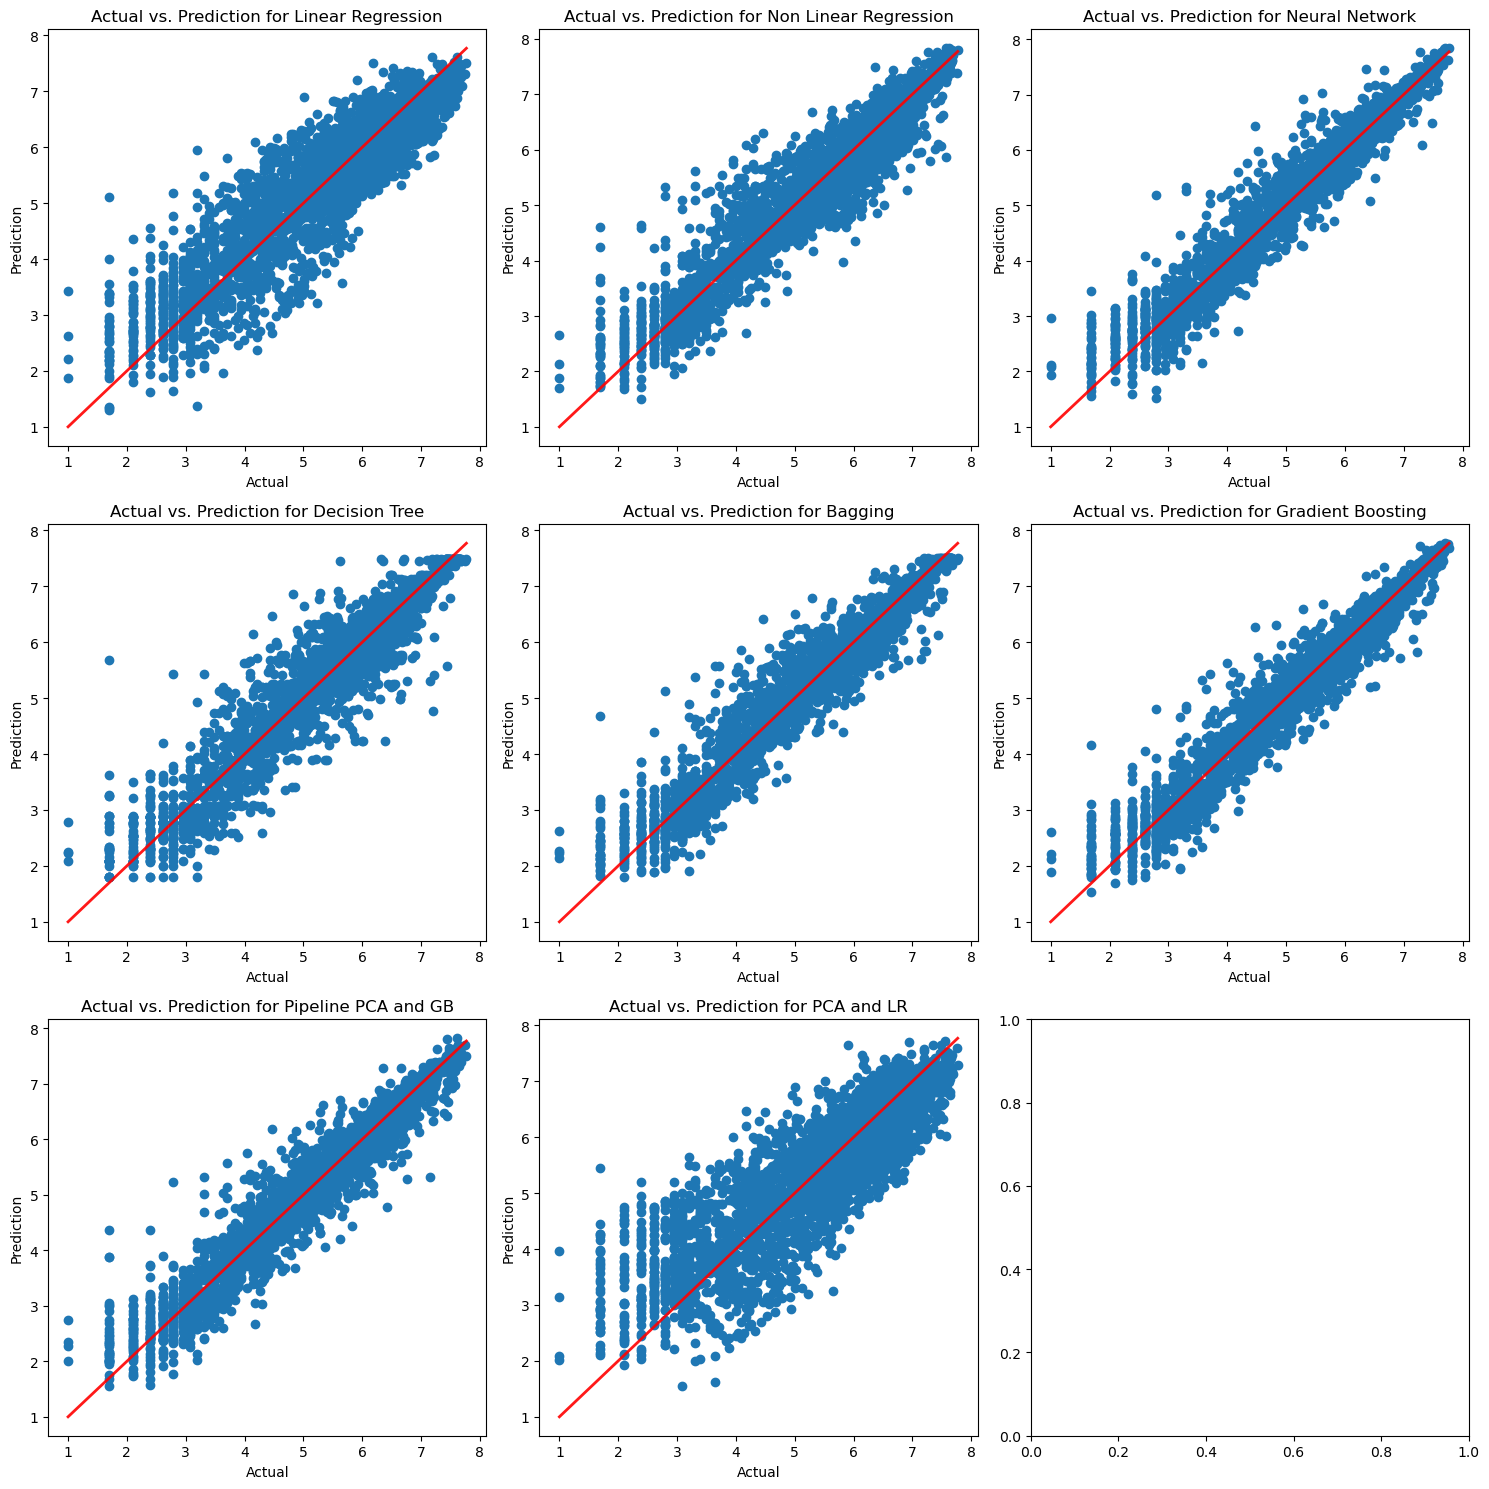

In [72]:
# Visualize Model Predictions vs. Actual Values

# Define the names of the different models
models_name=['Linear Regression','Non Linear Regression','Neural Network','Decision Tree','Bagging','Gradient Boosting'
            ,'Pipeline PCA and GB','PCA and LR']

# We will be making 3 rows x 3 columns of subplots
plt.subplots(3,3, figsize=(15,15))

j=1  # Initialize a counter for subplot placement

# Iterate through each model's predictions
for i in range(len(models_name)):
    
    # Creating a scatter plot for every iteration
    plt.subplot(3,3,j)
    plt.scatter(x = y_r_test, y=prediction_df.iloc[:,i])
    
    # Set the titles and labels
    plt.title(f'Actual vs. Prediction for {models_name[i]}')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    
    #Add 45 degree line
    xp = np.linspace(y_r_test.min(), y_r_test.max(), 100)
    plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')
    j+=1

# Adjust subplot layout for better spacing
plt.tight_layout()

plt.show()    

From the scatterplots, we gain insight into the models' effectiveness in predicting the target variable. Among the top-performing models, such as the Neural Network, Bagging, Gradient Boosting, and pipeline with PCA and Gradient Boosting the data points are remarkably close to the red reference line. This proximity signifies the high degree of correspondence between the predicted values and the actual observations. Conversely, the scatterplots corresponding to the less successful models, like Linear Regression and its integartion with PCA, reveal a wider dispersion of data points around the red reference line. This dispersion indicates a greater variability between the predicted and actual values, suggesting that these models may exhibit less precision in their predictions compared to the more successful ones.

In the following cells, we will visualize the results obtained from comparing the different models to have better insights.

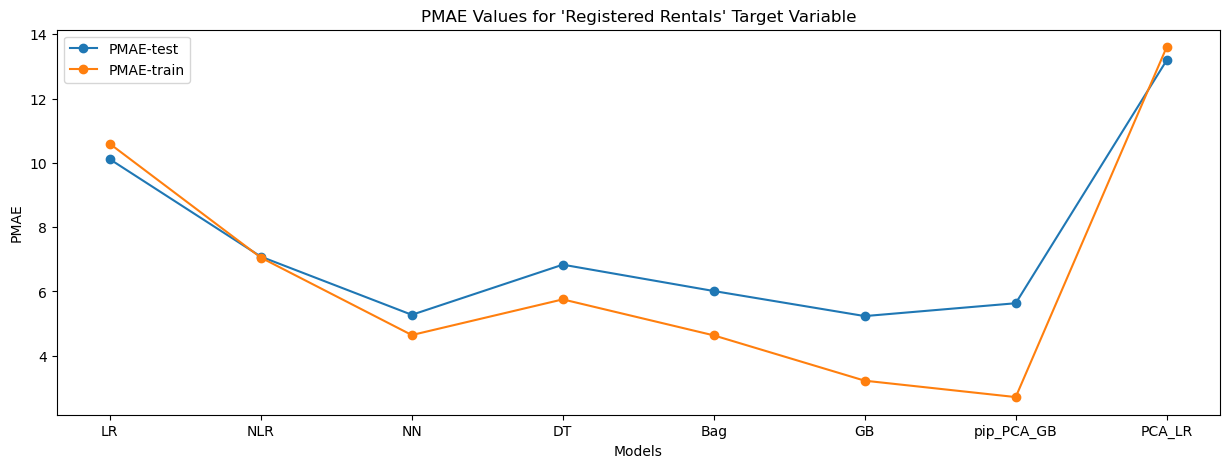

In [73]:
# Visualize PMAE values on train and test datasets for the models in predicting registered rentals y_r
model_list = ['LR', 'NLR', 'NN', 'DT', 'Bag', 'GB', 'pip_PCA_GB', 'PCA_LR']

plt.figure(figsize=(15, 5))

plt.plot(range(len(model_list)), model_comp['PMAE on test'], label='PMAE-test', marker='o')
plt.plot(range(len(model_list)), model_comp['PMAE on train'], label='PMAE-train', marker='o')
plt.xticks(range(len(model_list)), model_list)  # Use integer indexing for x-axis ticks

plt.xlabel("Models")
plt.ylabel("PMAE")
plt.title("PMAE Values for 'Registered Rentals' Target Variable")
plt.legend()

plt.show()

Finding:
- Analyzing the line plot enables us to assess model performance on both the test and train datasets. Notably, Neural Network, Gradient Boosting, and the integrated PCA-Gradient Boosting models exhibit the highest performance in handling the test dataset. For the training dataset, both the PCA-Gradient Boosting pipeline and individual Gradient Boosting models outperform others.
- The difference between PMAE for train and test datasets are not significant to be considered as an indicative of overfitting. The largest difference is observed in the PCA-Gradient Boosting pipeline, amounting to 2.8%.
- Linear Regression and its integration with PCA are the least performing models in dealing with this dataset.

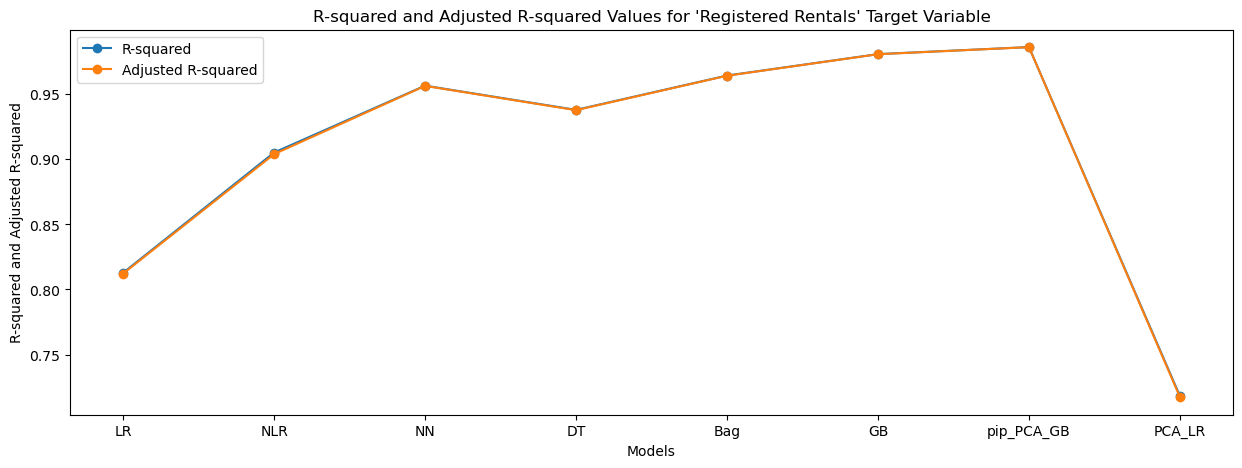

In [74]:
# Visualize R-squared and adjusted R-squared values on train and test datasets for the models in predicting y_r
model_list = ['LR', 'NLR', 'NN', 'DT', 'Bag', 'GB', 'pip_PCA_GB', 'PCA_LR']

plt.figure(figsize=(15, 5))

plt.plot(range(len(model_list)), model_comp['R-squared'], label='R-squared', marker='o')
plt.plot(range(len(model_list)), model_comp['Adjusted R-squared'], label='Adjusted R-squared', marker='o')
plt.xticks(range(len(model_list)), model_list)  # Use integer indexing for x-axis ticks

plt.xlabel("Models")
plt.ylabel("R-squared and Adjusted R-squared")
plt.title("R-squared and Adjusted R-squared Values for 'Registered Rentals' Target Variable")
plt.legend()

plt.show()

Finding:
- In terms of R-squared and Adjusted R-squared values, the integrated PCA-Gradient Boosting pipeline emerges as the top-performing model, followed by Gradient Boosting, bagging, and the Neural Network model.
- The closeness of R-squared and Adjusted R-squared values between the test and train data suggests that all the models are likely to generalize well to new and unseen data. When these values are similar for both datasets, it indicates that the models are not overfitting, and the relationships captured in the training data are likely to hold true in real-world scenarios.
- Both Linear Regression and its integration with PCA exhibit the lowest performance among the models when considering R-squared and Adjusted R-squared values in relation to this dataset. These results align with the findings from the previous plot, which considered PMAE values.

**Overall**
- To sum up, our findings highlight that the Gradient Boosting, Neural Network, and integrated PCA-Gradient Boosting pipeline, Bagging models emerge as the top performers in predicting the 'Registered Bikes Rentals' variable (y_r), as evidenced by their favorable results in terms of PMAE, R-squared, and Adjusted R-squared values.
- Regarding feature importance, it's important to note that different models result in varying importance values for features. For instance, in the Gradient Boosting model, features like 'weekday2', 'season3', 'weathersit2' and 'month11' rank as the top features in terms of importance. In contrast, for the Neural Network model, features such as 'weathersit1' and 'weathersit2', 'year', 'season1', 'hr4', 'hr3' take precedence as the top important features.
